# LUNGCNET FOR LUNG CANCER DETECTION AND CLASSIFICATION



# Library Import

I will be importing the various libraries that will be used during the execution of this project

In [1]:
import tensorflow as tf #Crucial for Tensorflow
import numpy as np #Crucial for Numpy operations
from matplotlib import pyplot as plt  #Crucial for plotting
import os #This gives access to the Operating system directory
import cv2 #For working with image and video processing functions.
import imghdr #For image
import shutil
import pandas as pd
from PIL import Image
import tensorflow as tf #Crucial for Tensorflow
import tensorflow_hub as hub
from google.colab import drive
import os
import shutil
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import random



# Google Drive

All my files are stored in google drive, so, I will be mounting it so as to have access to them from this notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive') #Mounting the drive

Mounted at /content/drive


# Creating A dataframe

The files didn't come with a label, so, I want to create a dataframe that will create a label for each of the file. Meaning, the class they all belong to

In [4]:
import os
import shutil
import pandas as pd

# Defining the paths to the source and destination directories
source_dirs = [
    "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/Benign",
    "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/Malignant",
    "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/Normal"
]
destination_dir = "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/All Cases"

# Creating the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Moving files from source directories to the destination directory
for source_dir in source_dirs:
    for file in os.listdir(source_dir):
        source_path = os.path.join(source_dir, file)
        destination_path = os.path.join(destination_dir, file)
        shutil.move(source_path, destination_path)

# Define a list to store the data
data = []

# Iterate through each file in the destination directory
for file in os.listdir(destination_dir):
    # Extract the file name without the extension
    file_name, _ = os.path.splitext(file)
    # Derive the lung cancer type from the file name
    if "bengin" in file.lower():
        lung_cancer_type = "Benign"
    elif "malignant" in file.lower():
        lung_cancer_type = "Malignant"
    elif "normal" in file.lower():
        lung_cancer_type = "Normal"
    else:
        lung_cancer_type = "Unknown"
    # Append the file name and lung cancer type to the data list
    data.append({"ID": file_name, "Lung Cancer Type": lung_cancer_type})

# Create a DataFrame from the data list
df = pd.DataFrame(data)


# Exploratory Data Analysis

I will be doing some exploratory data analysis
* Class Distribution
* Distribution of pixel intensities
* Distribution of images sizes
* Sample Images

## Class Distribution

A quick look at the number of images in each class

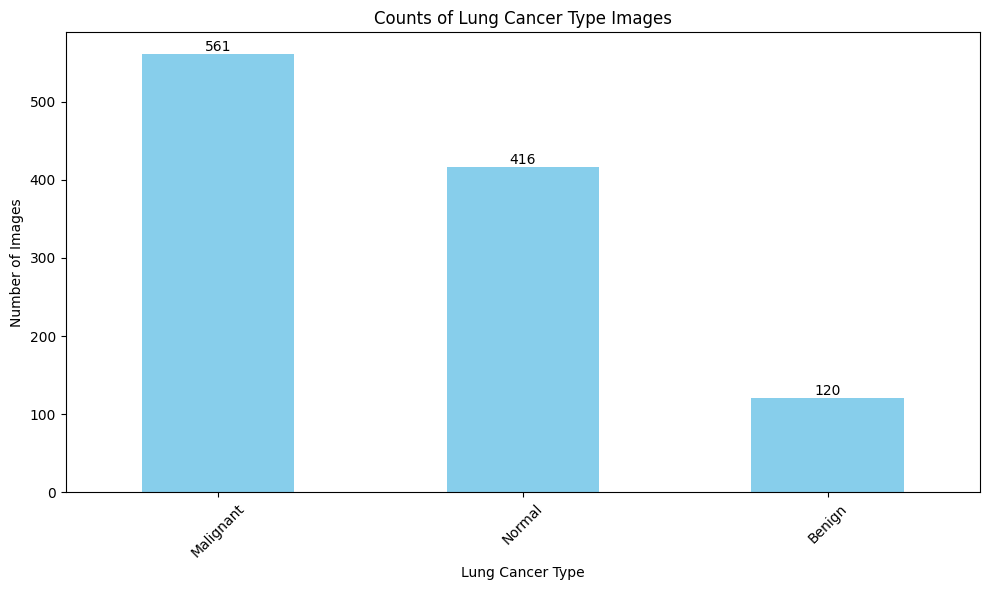

In [5]:
# Get the value counts of 'Lung Cancer Type'
value_counts = df['Lung Cancer Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Counts of Lung Cancer Type Images')
plt.xlabel('Lung Cancer Type')
plt.ylabel('Number of Images')

# Add annotations for each bar
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Distribution of pixel intensities

Provides a visual representation of the distribution of pixel values in the images

Visualizing pixel intensity distribution for All Cases class:


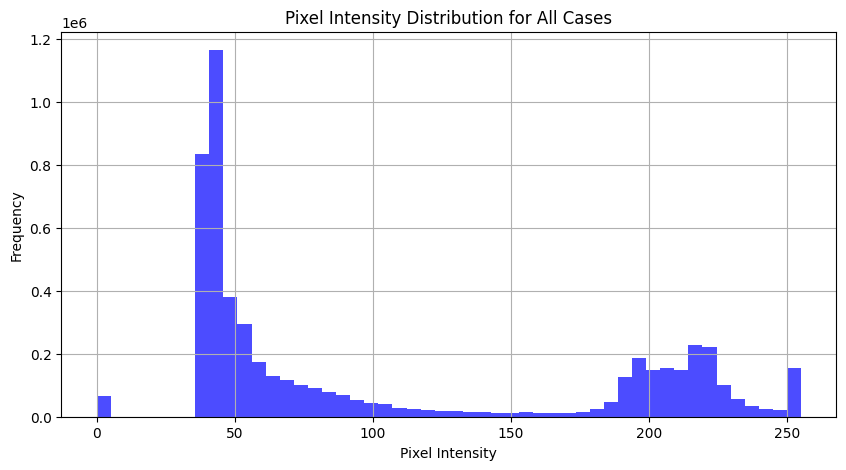

In [ ]:
import random

def visualize_pixel_intensity(file_path, class_name, num_images=None):
    print(f"Visualizing pixel intensity distribution for {class_name} class:")
    pixel_intensity = []
    class_files = os.listdir(file_path)
    if num_images is not None and num_images < len(class_files):
        class_files = random.sample(class_files, num_images)  # Randomly select a subset of images
    for file_name in class_files:
        image = cv2.imread(os.path.join(file_path, file_name), cv2.IMREAD_GRAYSCALE)
        pixel_intensity.extend(image.flatten())
    plt.figure(figsize=(10, 5))
    plt.hist(pixel_intensity, bins=50, color='blue', alpha=0.7)
    plt.title(f"Pixel Intensity Distribution for {class_name}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Specify the maximum number of images to process for each class
max_images_per_class = 20

# Path to the folder containing all images
all_cases_file_path = "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/All Cases"

# Visualize pixel intensity distribution for each class (limiting to max_images_per_class)
visualize_pixel_intensity(all_cases_file_path, "All Cases", num_images=max_images_per_class)



## Distribution of images sizes

Checking the image size

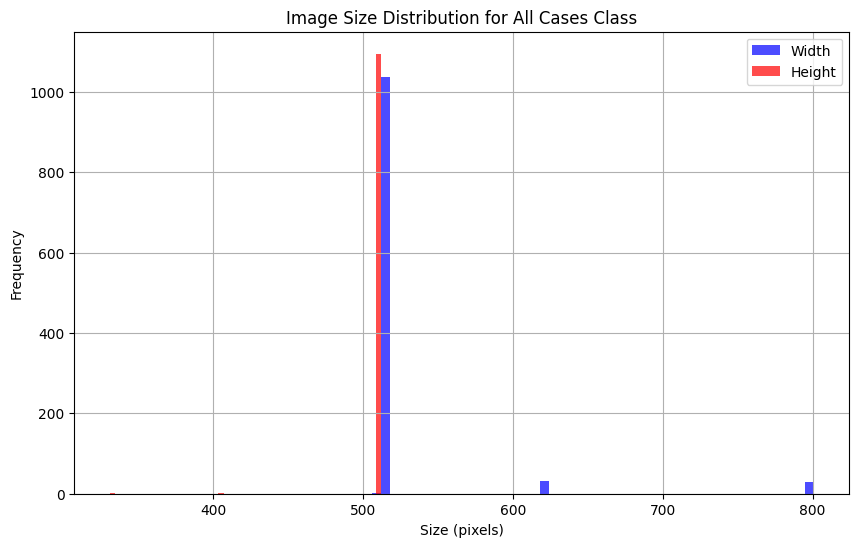

In [ ]:
def get_image_sizes(folder_path):
    image_sizes = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                height, width, _ = image.shape  # For color images
                # For grayscale images, use: height, width = image.shape
                image_sizes.append((width, height))
    return image_sizes

def visualize_image_size_distribution(image_sizes, class_name):
    widths = [size[0] for size in image_sizes]
    heights = [size[1] for size in image_sizes]

    plt.figure(figsize=(10, 6))
    plt.hist(widths, bins=50, color='blue', alpha=0.7, label='Width')
    plt.hist(heights, bins=50, color='red', alpha=0.7, label='Height')
    plt.title(f"Image Size Distribution for {class_name} Class")
    plt.xlabel("Size (pixels)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()

# Path to the folder containing all images
all_cases_file_path = "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/All Cases"

# Example usage:
all_cases_image_sizes = get_image_sizes(all_cases_file_path)
visualize_image_size_distribution(all_cases_image_sizes, "All Cases")



## Sample Images

Showing 4 sample images for each class

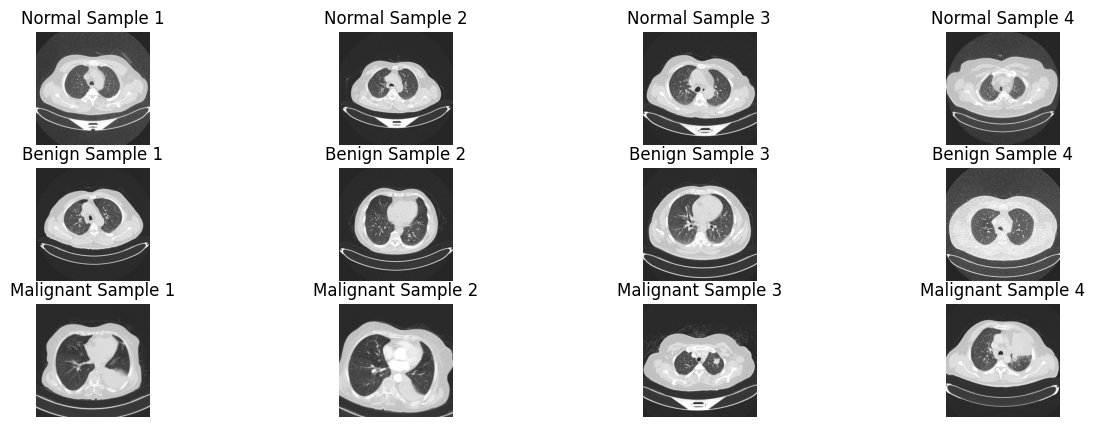

In [6]:

# Function to visualize sample images for each lung cancer type
def visualize_samples_from_df(df, all_cases_folder, num_samples_per_class=4):
    # Get unique lung cancer types
    unique_types = df['Lung Cancer Type'].unique()

    plt.figure(figsize=(15, 5))

    for i, cancer_type in enumerate(unique_types):
        # Filter dataframe for the current lung cancer type
        type_df = df[df['Lung Cancer Type'] == cancer_type]

        # Randomly select num_samples_per_class images for the current lung cancer type
        sampled_files = random.sample(type_df['ID'].tolist(), min(num_samples_per_class, len(type_df)))

        for j, file_name in enumerate(sampled_files):
            # Read and display the image
            image = cv2.imread(os.path.join('/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/All Cases', file_name + '.jpg'))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.subplot(len(unique_types), num_samples_per_class, i * num_samples_per_class + j + 1)
            plt.imshow(image)
            plt.title(f"{cancer_type} Sample {j + 1}")
            plt.axis('off')

    plt.show()

# Call the function to visualize sample images
visualize_samples_from_df(df, '/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/All Cases', num_samples_per_class=4)


# Data Preprocessing

In this stage, I will be looking at the following
* Creating a filenames
* Converting Lung Cancer type to labels
* File Confirmation
* Unique label
* Label to Boolen
* Data Splitting
* Process Image
* Get Image Label
* Batch Processing
* Train and Validation Data

## File Names

Creating a filename list which will contain all the files in the All cases folder

In [7]:
 #Filenames
filenames = ["/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/All Cases/" + fnames + ".jpg" for fnames in df["ID"]]
filenames[1]

'/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/All Cases/Normal case (182).jpg'

## Label Conversion

Converting the various lung cancer types to numpy array

In [8]:
#converting the labels to numpy
import numpy as np

labels = df["Lung Cancer Type"].to_numpy()
labels

array(['Normal', 'Normal', 'Normal', ..., 'Malignant', 'Malignant',
       'Malignant'], dtype=object)

## File Confirmation

Checking to see if the files and labels are the same number. This is to make sure each file has the corresponding label

In [9]:
#checking to see if the number of files and labels are equal
if len(filenames) == len(labels):
  print("Number of filenames matches labels ")
else:
  print("Number of filenames doesn't match labels ")

Number of filenames matches labels 


## Unique Label

I'm creating an numpy array that's goung to hold the unique class(Label)

In [10]:
#listing the unique labels
unique_cancer = np.unique(labels)
unique_cancer

array(['Benign', 'Malignant', 'Normal'], dtype=object)

## Label to Boolen

What happens here is, for every record in the dataframe, the label shows which class it belongs but indicating if it's true or false based on the position it is on the unique cancer label.

```
If row 2 is Benign, Unique_cancer will have ['Benign', 'Malignant', 'Normal']
while boolean_labels will have [True, False, False] because Benign is in index 0
```




In [11]:
#converting labels to boolean
boolean_labels  = [label == unique_cancer for label in labels]
boolean_labels[2]

array([False, False,  True])

## Data Splitting

I will be slippiting the data to train and test set

In [12]:
#Splitting data

X = filenames #filename list created
y = boolean_labels #boolean label for each filename

# Number of images to process
NUM_IMAGES = 2000 #@param {type: "slider", min:1000 , max:10000, step: 1000}

#Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state=42 # this will make it random
                                                  )

len(X_train), len(y_train), len(X_val), len(y_val)

(877, 877, 220, 220)

## Process Image

 This function takes an image file path, reads the image, applies optional data augmentation techniques (such as flipping, brightness/contrast adjustment, rotation, and zooming), converts the image to float32 data type, resizes it to the desired size, and returns the processed image tensor.

In [13]:
IMG_SIZE = 256 #default image size

def process_images(image_path, img_size=IMG_SIZE, augment=True, augmentation_options=None):
    """
    Take an image file path and turn it into a tensor, with optional data augmentation.

    Args:
    - image_path: Path to the image file
    - img_size: Size to which the image should be resized
    - augment: Whether to apply data augmentation
    - augmentation_options: Dict with parameters for specific augmentations

    Returns:
    - Processed image tensor
    """
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    if augment:
        if augmentation_options is None:
            augmentation_options = {}

        # Random flipping
        if augmentation_options.get('flip_horizontal', True):
            image = tf.image.random_flip_left_right(image)
        if augmentation_options.get('flip_vertical', False):
            image = tf.image.random_flip_up_down(image)

        # Random brightness and contrast
        if 'brightness' in augmentation_options:
            image = tf.image.random_brightness(image, max_delta=augmentation_options['brightness'])
        if 'contrast' in augmentation_options:
            lower, upper = augmentation_options['contrast']
            image = tf.image.random_contrast(image, lower=lower, upper=upper)

        # Additional augmentations
        if 'rotation' in augmentation_options:
            image = tf.image.rot90(image, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
        if 'zoom' in augmentation_options:
            scales = augmentation_options['zoom']  # Example: [0.8, 1.2]
            image = tf.image.central_crop(image, tf.random.uniform(shape=[], minval=scales[0], maxval=scales[1]))

    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])

    return image


## Image Label

This will return the image and label of an image path passed to it in a tuple form

In [14]:


def get_image_label(image_path, label=None, augment=False):
    """
    Return image and label in a tuple, with optional augmentation.

    Args:
    - image_path: Path to the image file
    - label: Optional label associated with the image (default is None)
    - augment: Boolean, whether to apply data augmentation (default is False)

    Returns:
    - Tuple containing processed image tensor and label (if provided)
    """
    image = process_images(image_path, augment=augment)
    if label is not None:
        return (image, label)
    else:
        return image



## Image Batch processing

This function turns the data into batches

In [15]:
#processing images in batches

#define batch size
BATCH_SIZE = 32


def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image(X) and label(y) pairs.
    Shuffles the data if it's training data and no shuffling if it's validation/test data.
    Accepts test data as input (no label).
    """
    # Configure augmentation based on the data type
    augment = not (valid_data or test_data)  # Enable augmentation for training data only

    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))  # Only filepaths, no labels
        data_batch = data.map(lambda x: get_image_label(x, augment=augment)).batch(batch_size)
        return data_batch

    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(lambda x, y: get_image_label(x, y, augment=augment)).batch(batch_size)
        return data_batch

    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(lambda x, y: get_image_label(x, y, augment=augment)).batch(batch_size)
        return data_batch




## Training and Validation Data

Creating the training and validation data that the models will use

In [16]:
#train  and validation batches

train_data = create_data_batches(X_train, y_train)

val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


## Tensorboard Callbard

This is for monitoring each model's performance

In [25]:
#creating a Tensorboard callback(Monitors model's performance)
%load_ext tensorboard

import datetime
#tensorboard call back function
def create_tensorboard_callback():
  #create a log directory for storing the tensorboard log
  logdir = os.path.join("/content/drive/MyDrive/Image Classification/pets/logs/",
                        datetime.datetime.now().strftime("%Y%m%d - %H%M%S") #Keeps track of the log time
  )
  return tf.keras.callbacks.TensorBoard(logdir)


#Preventing overfitting when a evaluation metric stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 5)

# Training the model

NUM_EPOCHS = 90 #@param {type:"slider", min:10, max:100, step:10}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Building and Training the models

In this session, I will be building the following models:

* LungCNet
* VGG16
* ResNet50
* InceptionV3
* MobileNetv2


In [24]:
#learning rate value
LEARNING_RATE = 0.0001


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [19]:

def create_improved_LungCNET_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), output_shape=len(unique_cancer)):


    lungCNET = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(output_shape, activation='softmax')  # Multiclass classification
    ])

    return lungCNET

# Define the input shape based on the dimensions of CT scan images
input_shape=(IMG_SIZE, IMG_SIZE, 3)
output_shape=len(unique_cancer)

# Create the custom CNN model
lungCNET_model = create_improved_LungCNET_model(input_shape, output_shape)

# Compile the model
lungCNET_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and get the history
lungCNET_model_history = lungCNET_model.fit(train_data,
                                            epochs=NUM_EPOCHS,
                                            validation_data=val_data,
                                            callbacks=[create_tensorboard_callback(), early_stopping])

print("LungCNET Model Training Completed")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 781ms/step - accuracy: 0.4623 - loss: 2.1206 - val_accuracy: 0.7000 - val_loss: 0.7401
Epoch 2/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.6856 - loss: 0.7581 - val_accuracy: 0.8318 - val_loss: 0.5314
Epoch 3/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step - accuracy: 0.7771 - loss: 0.5365 - val_accuracy: 0.8909 - val_loss: 0.3024
Epoch 4/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.8748 - loss: 0.3344 - val_accuracy: 0.9500 - val_loss: 0.2131
Epoch 5/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.8984 - loss: 0.2543 - val_accuracy: 0.9636 - val_loss: 0.1310
Epoch 6/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 302ms/step - accuracy: 0.9400 - loss: 0.1611 - val_accuracy: 0.9545 - val_loss: 0.1140
Epoch 7/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step - accuracy: 0.9449 - loss: 0.1703 - val_accuracy: 0.9682 - val_loss: 0.1010
Epoch 8/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.9717 - loss: 0.0814 - val_accurac

# VGG 16

In [20]:
def create_fine_tuned_vgg16_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), output_shape=len(unique_cancer), num_epochs=NUM_EPOCHS, learning_rate=LEARNING_RATE):
    # Load the VGG16 base model with pre-trained weights
    base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Unfreeze the last 4 layers of the base model
    for layer in base_model.layers[-4:]:
        layer.trainable = True

    # Add custom classification head
    global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output_layer = tf.keras.layers.Dense(output_shape, activation='softmax')(global_average_pooling_layer)

    # Create the fine-tuned model
    model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    # Compile the model with a smaller learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=learning_rate,
        decay_steps=10000,
        decay_rate=0.96,
        staircase=True)

    # Compile the model with the learning rate schedule
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    # Fine-tune the model
    model_history = model.fit(train_data,
                              epochs=num_epochs,
                              validation_data=val_data,
                              callbacks=[create_tensorboard_callback(), early_stopping])

    return model, model_history

# Create and fine-tune the VGG16 model
vgg16_model, vgg16_model_history = create_fine_tuned_vgg16_model()
print("Fine-tuned VGG16 Model Completed")



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.5470 - loss: 0.9203 - val_accuracy: 0.7091 - val_loss: 0.6579
Epoch 2/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 666ms/step - accuracy: 0.7661 - loss: 0.5351 - val_accuracy: 0.8773 - val_loss: 0.3253
Epoch 3/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 622ms/step - accuracy: 0.8489 - loss: 0.3897 - val_accuracy: 0.8227 - val_loss: 0.4686
Epoch 4/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 662ms/step - accuracy: 0.8637 - loss: 0.3703 - val_accuracy: 0.9000 - val_loss: 0.2521
Epoch 5/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 693ms/step - accuracy: 0.8817 - loss: 0.2535 - val_accuracy: 0.9136 - val_loss: 0.2198
Fine-tuned VGG16 Model Completed


## RestNet50

In [21]:
def fine_tune_resnet50_model(train_data, val_data, num_epochs, initial_learning_rate=LEARNING_RATE):
    # Load the ResNet50 base model with pre-trained weights
    base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # Unfreeze the last 10 layers of the base model
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Add custom classification head
    global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output_layer = tf.keras.layers.Dense(len(unique_cancer), activation='softmax')(global_average_pooling_layer)

    # Create the fine-tuned model
    resnet50_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    # Define learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.96,
        staircase=True)

    # Compile the model with the learning rate schedule
    resnet50_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    learning_rate_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5)

    # Train the model
    resnet50_model_history = resnet50_model.fit(train_data,
                                                epochs=num_epochs,
                                                validation_data=val_data,
                                                callbacks=[early_stopping, learning_rate_scheduler])

    return resnet50_model, resnet50_model_history

# Fine-tune ResNet50 Model
resnet50_model, resnet50_model_history = fine_tune_resnet50_model(train_data, val_data, NUM_EPOCHS, LEARNING_RATE)
print("ResNet50 Model Fine-tuning Completed")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.7819 - loss: 0.4713 - val_accuracy: 0.4909 - val_loss: 0.9138 - learning_rate: 1.0000e-04
Epoch 2/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 66s 372ms/step - accuracy: 0.9744 - loss: 0.0895 - val_accuracy: 0.5091 - val_loss: 1.0049 - learning_rate: 1.0000e-04
Epoch 3/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 387ms/step - accuracy: 0.9849 - loss: 0.0358 - val_accuracy: 0.5091 - val_loss: 1.0516 - learning_rate: 1.0000e-04
Epoch 4/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 433ms/step - accuracy: 0.9956 - loss: 0.0197 - val_accuracy: 0.5091 - val_loss: 1.3200 - learning_rate: 1.0000e-04
ResNet50 Model Fine-tuning Completed




```
# This is formatted as code
```

## InceptionV3

In [27]:
def fine_tune_inceptionv3_model(train_data, val_data, num_epochs, initial_learning_rate=0.001):
    """
    Fine-tune InceptionV3 model with TensorBoard monitoring and custom callbacks.

    Args:
        train_data: Training dataset
        val_data: Validation dataset
        num_epochs: Number of epochs to train
        initial_learning_rate: Initial learning rate (default: 0.001)

    Returns:
        tuple: (trained model, training history)
    """
    try:
        # Load the InceptionV3 base model with pre-trained weights
        base_model = tf.keras.applications.InceptionV3(
            weights='imagenet',
            include_top=False,
            input_shape=(IMG_SIZE, IMG_SIZE, 3)
        )

        # Unfreeze the last 20 layers of the base model
        for layer in base_model.layers[-20:]:
            layer.trainable = True

        # Add custom classification head
        global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
        output_layer = tf.keras.layers.Dense(len(unique_cancer), activation='softmax')(global_average_pooling_layer)

        # Create the fine-tuned model
        inceptionv3_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

        # Compile the model with a fixed learning rate
        optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
        inceptionv3_model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Create TensorBoard callback
        tensorboard_callback = create_tensorboard_callback()

        # Define callbacks
        callbacks = [
            # TensorBoard callback
            tensorboard_callback,

            # Early stopping with your specified settings
            tf.keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=5,
                restore_best_weights=True
            ),

            # Learning rate reduction on plateau
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=2,
                min_lr=1e-6,
                verbose=1
            ),

            # ModelCheckpoint to save the best model
            tf.keras.callbacks.ModelCheckpoint(
                'best_inceptionv3_model.keras',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Train the model
        inceptionv3_model_history = inceptionv3_model.fit(
            train_data,
            epochs=num_epochs,
            validation_data=val_data,
            callbacks=callbacks
        )

        return inceptionv3_model, inceptionv3_model_history

    except Exception as e:
        print(f"An error occurred during model training: {str(e)}")
        raise


inceptionv3_model, inceptionv3_model_history = fine_tune_inceptionv3_model(
    train_data,
    val_data,
    NUM_EPOCHS,
    LEARNING_RATE
)
print("InceptionV3 Model Fine-tuning Completed")

'''

def fine_tune_inceptionv3_model(train_data, val_data, num_epochs, initial_learning_rate=LEARNING_RATE):
    # Load the InceptionV3 base model with pre-trained weights
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # Unfreeze the last 20 layers of the base model
    for layer in base_model.layers[-20:]:
        layer.trainable = True

    # Add custom classification head
    global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output_layer = tf.keras.layers.Dense(len(unique_cancer), activation='softmax')(global_average_pooling_layer)

    # Create the fine-tuned model
    inceptionv3_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    # Define learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.96,
        staircase=True)

    # Compile the model with the learning rate schedule
    inceptionv3_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    learning_rate_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)

    # Train the model
    inceptionv3_model_history = inceptionv3_model.fit(train_data,
                                                      epochs=num_epochs,
                                                      validation_data=val_data,
                                                      callbacks=[early_stopping, learning_rate_scheduler])

    return inceptionv3_model, inceptionv3_model_history

# Fine-tune InceptionV3 Model
inceptionv3_model, inceptionv3_model_history = fine_tune_inceptionv3_model(train_data, val_data, NUM_EPOCHS, LEARNING_RATE)
print("InceptionV3 Model Fine-tuning Completed")
'''

Epoch 1/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7867 - loss: 0.5218   
Epoch 1: val_accuracy improved from -inf to 0.86364, saving model to best_inceptionv3_model.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.7898 - loss: 0.5147 - val_accuracy: 0.8636 - val_loss: 0.6512 - learning_rate: 1.0000e-04
Epoch 2/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.9724 - loss: 0.0839
Epoch 2: val_accuracy did not improve from 0.86364
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 353ms/step - accuracy: 0.9723 - loss: 0.0840 - val_accuracy: 0.7364 - val_loss: 0.8471 - learning_rate: 1.0000e-04
Epoch 3/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.9842 - loss: 0.0411
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 3: val_accuracy did not improve from 0.86364
28/28 ━━━━━━━━━━━━━━━━━━━━ 18s 340ms/step - accuracy: 0.9841 - loss: 0.0416 - val_accuracy: 0.7545 - val_loss: 0.6796 - learning_rate: 1.0000e-04
Epoch 4/90
28/28 ━━━━━━━━━━━

'\n\ndef fine_tune_inceptionv3_model(train_data, val_data, num_epochs, initial_learning_rate=LEARNING_RATE):\n    # Load the InceptionV3 base model with pre-trained weights\n    base_model = tf.keras.applications.InceptionV3(weights=\'imagenet\', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))\n\n    # Unfreeze the last 20 layers of the base model\n    for layer in base_model.layers[-20:]:\n        layer.trainable = True\n\n    # Add custom classification head\n    global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)\n    output_layer = tf.keras.layers.Dense(len(unique_cancer), activation=\'softmax\')(global_average_pooling_layer)\n\n    # Create the fine-tuned model\n    inceptionv3_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)\n\n    # Define learning rate schedule\n    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(\n        initial_learning_rate=initial_learning_rate,\n        decay_steps=10000,\n  

# Mobile Net 2

In [29]:
def fine_tune_mobilenetv2_model(train_data, val_data, num_epochs, initial_learning_rate=0.001):
    """
    Fine-tune MobileNetV2 model with TensorBoard monitoring and custom callbacks.

    Args:
        train_data: Training dataset
        val_data: Validation dataset
        num_epochs: Number of epochs to train
        initial_learning_rate: Initial learning rate (default: 0.001)

    Returns:
        tuple: (trained model, training history)
    """
    try:
        # Load the MobileNetV2 base model with pre-trained weights
        base_model = tf.keras.applications.MobileNetV2(
            weights='imagenet',
            include_top=False,
            input_shape=(IMG_SIZE, IMG_SIZE, 3)
        )

        # Unfreeze the last 10 layers of the base model
        for layer in base_model.layers[-10:]:
            layer.trainable = True

        # Add custom classification head
        global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
        output_layer = tf.keras.layers.Dense(len(unique_cancer), activation='softmax')(global_average_pooling_layer)

        # Create the fine-tuned model
        mobilenetv2_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

        # Compile the model with a fixed learning rate
        optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
        mobilenetv2_model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        # Create TensorBoard callback
        tensorboard_callback = create_tensorboard_callback()

        # Define callbacks
        callbacks = [
            # TensorBoard callback
            tensorboard_callback,

            # Early stopping with your specified settings
            tf.keras.callbacks.EarlyStopping(
                monitor='val_accuracy',
                patience=5,
                restore_best_weights=True
            ),

            # Learning rate reduction on plateau
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=2,
                min_lr=1e-6,
                verbose=1
            ),

            # ModelCheckpoint to save the best model
            tf.keras.callbacks.ModelCheckpoint(
                'best_mobilenetv2_model.keras',
                monitor='val_accuracy',
                save_best_only=True,
                verbose=1
            )
        ]

        # Train the model
        mobilenetv2_model_history = mobilenetv2_model.fit(
            train_data,
            epochs=num_epochs,
            validation_data=val_data,
            callbacks=callbacks
        )

        return mobilenetv2_model, mobilenetv2_model_history

    except Exception as e:
        print(f"An error occurred during model training: {str(e)}")
        raise


mobilenetv2_model, mobilenetv2_model_history = fine_tune_mobilenetv2_model(
    train_data,
    val_data,
    NUM_EPOCHS,
    LEARNING_RATE
)
print("MobileNetV2 Model Fine-tuning Completed")

'''
def fine_tune_mobilenetv2_model(train_data, val_data, num_epochs, initial_learning_rate=LEARNING_RATE):
    # Load the MobileNetV2 base model with pre-trained weights
    base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    # Unfreeze the last 10 layers of the base model
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Add custom classification head
    global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output_layer = tf.keras.layers.Dense(len(unique_cancer), activation='softmax')(global_average_pooling_layer)

    # Create the fine-tuned model
    mobilenetv2_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)

    # Define learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=initial_learning_rate,
        decay_steps=10000,
        decay_rate=0.96,
        staircase=True)

    # Compile the model with the learning rate schedule
    mobilenetv2_model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    learning_rate_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)

    # Train the model
    mobilenetv2_model_history = mobilenetv2_model.fit(train_data,
                                                      epochs=num_epochs,
                                                      validation_data=val_data,
                                                      callbacks=[early_stopping, learning_rate_scheduler])

    return mobilenetv2_model, mobilenetv2_model_history

# Fine-tune MobileNetV2 Model
mobilenetv2_model, mobilenetv2_model_history = fine_tune_mobilenetv2_model(train_data, val_data, NUM_EPOCHS, LEARNING_RATE)
print("MobileNetV2 Model Fine-tuning Completed")
'''

<ipython-input-29-9bb42ac545d5>:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Epoch 1/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.7710 - loss: 0.5249
Epoch 1: val_accuracy improved from -inf to 0.76364, saving model to best_mobilenetv2_model.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7740 - loss: 0.5190 - val_accuracy: 0.7636 - val_loss: 0.6221 - learning_rate: 1.0000e-04
Epoch 2/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.9790 - loss: 0.1125
Epoch 2: val_accuracy did not improve from 0.76364
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.9789 - loss: 0.1120 - val_accuracy: 0.7273 - val_loss: 0.6520 - learning_rate: 1.0000e-04
Epoch 3/90
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.9934 - loss: 0.0453
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 3: val_accuracy did not improve from 0.76364
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 0.9934 - loss: 0.0453 - val_accuracy: 0.6409 - val_loss: 0.8246 - learning_rate: 1.0000e-04
Epoch 4/90
28/28 ━━━━━━━━━━━━━━

'\ndef fine_tune_mobilenetv2_model(train_data, val_data, num_epochs, initial_learning_rate=LEARNING_RATE):\n    # Load the MobileNetV2 base model with pre-trained weights\n    base_model = tf.keras.applications.MobileNetV2(weights=\'imagenet\', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))\n\n    # Unfreeze the last 10 layers of the base model\n    for layer in base_model.layers[-10:]:\n        layer.trainable = True\n\n    # Add custom classification head\n    global_average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)\n    output_layer = tf.keras.layers.Dense(len(unique_cancer), activation=\'softmax\')(global_average_pooling_layer)\n\n    # Create the fine-tuned model\n    mobilenetv2_model = tf.keras.Model(inputs=base_model.input, outputs=output_layer)\n\n    # Define learning rate schedule\n    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(\n        initial_learning_rate=initial_learning_rate,\n        decay_steps=10000,\n    

# Model Evaluation

         Model  Train Accuracy  Validation Accuracy  Train Loss  \
0     LungCNET        0.996579             0.990909    0.010232   
1        VGG16        0.892816             0.913636    0.244961   
2     ResNet50        0.992018             0.509091    0.023381   
3  InceptionV3        0.998860             0.863636    0.007527   
4  MobileNetV2        0.998860             0.763636    0.013115   

   Validation Loss  
0         0.026793  
1         0.219798  
2         0.913764  
3         0.473802  
4         0.622137  


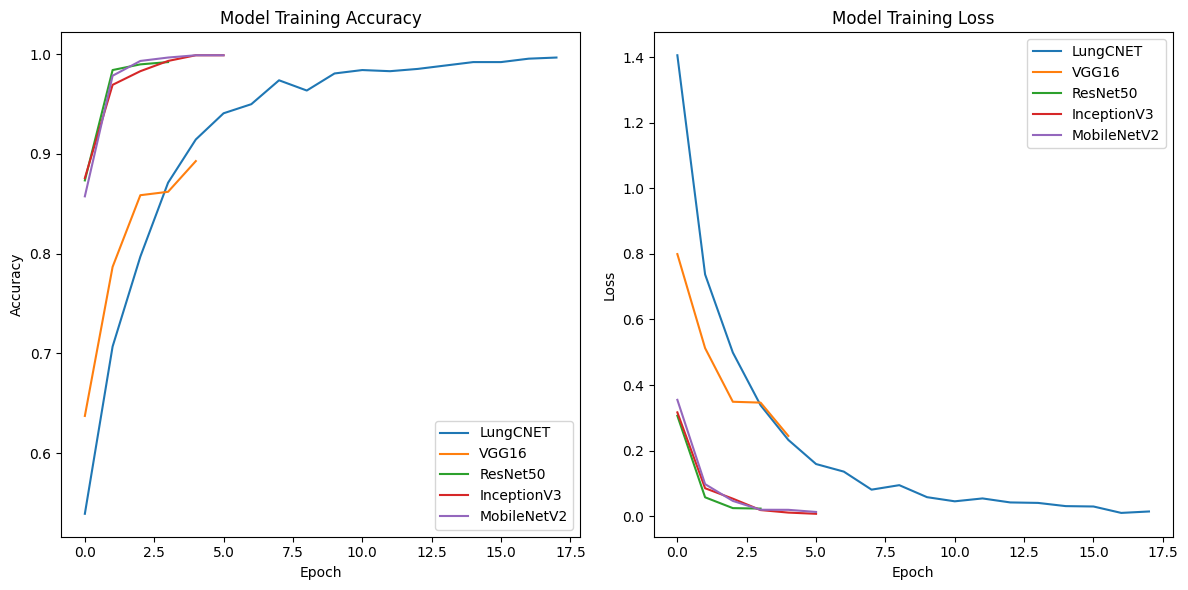

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the models and their histories
models = [
    ("LungCNET", lungCNET_model_history),
    ("VGG16", vgg16_model_history),
    ("ResNet50", resnet50_model_history),
    ("InceptionV3", inceptionv3_model_history),
    ("MobileNetV2", mobilenetv2_model_history)
]

# Extract metrics for each model
metrics = []
for model_name, history in models:
    metrics.append({
        "Model": model_name,
        "Train Accuracy": max(history.history['accuracy']),
        "Validation Accuracy": max(history.history['val_accuracy']),
        "Train Loss": min(history.history['loss']),
        "Validation Loss": min(history.history['val_loss'])
    })

# Create DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Display metrics
print(metrics_df)

# Plot performance metrics
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
for model_name, history in models:
    plt.plot(history.history['accuracy'], label=model_name)
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
for model_name, history in models:
    plt.plot(history.history['loss'], label=model_name)
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step


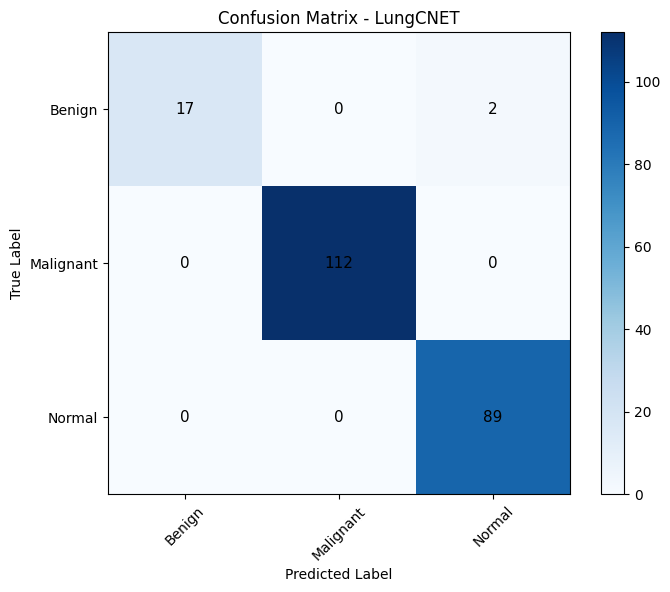

Classification Report - LungCNET:
              precision    recall  f1-score   support

      Benign       1.00      0.89      0.94        19
   Malignant       1.00      1.00      1.00       112
      Normal       0.98      1.00      0.99        89

    accuracy                           0.99       220
   macro avg       0.99      0.96      0.98       220
weighted avg       0.99      0.99      0.99       220



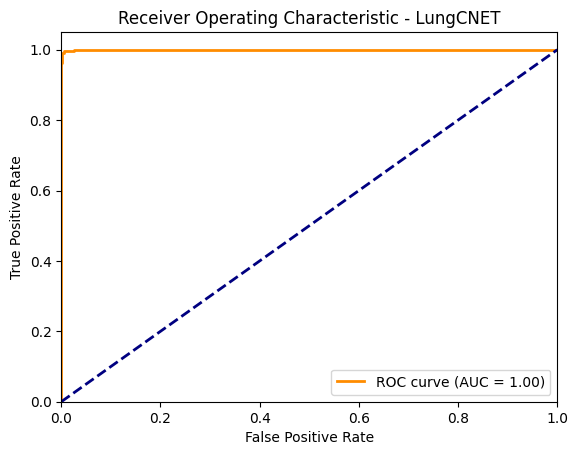

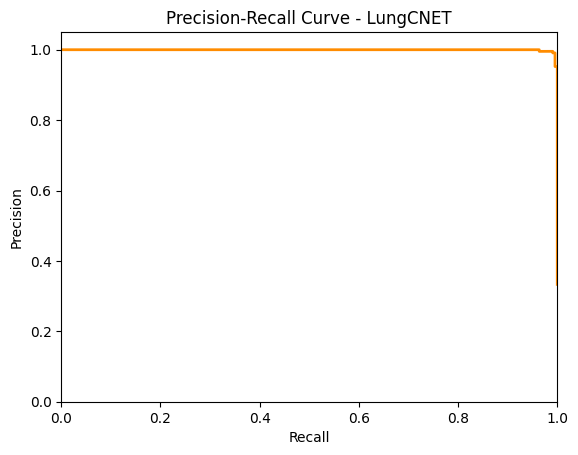

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


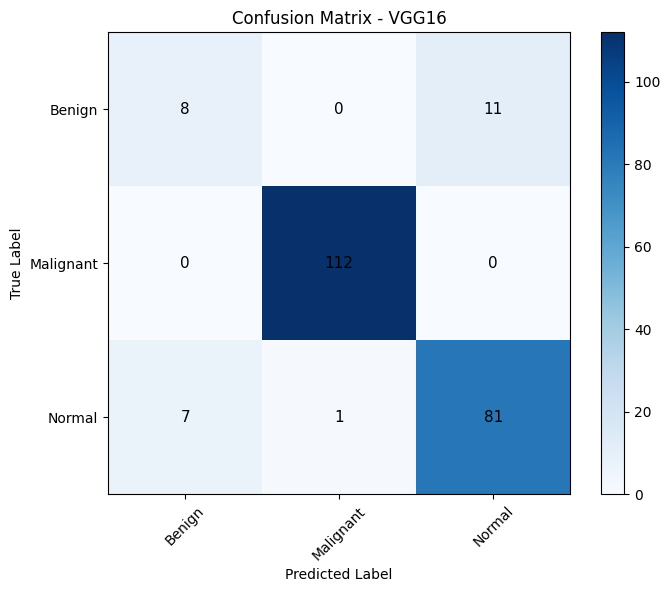

Classification Report - VGG16:
              precision    recall  f1-score   support

      Benign       0.53      0.42      0.47        19
   Malignant       0.99      1.00      1.00       112
      Normal       0.88      0.91      0.90        89

    accuracy                           0.91       220
   macro avg       0.80      0.78      0.79       220
weighted avg       0.91      0.91      0.91       220



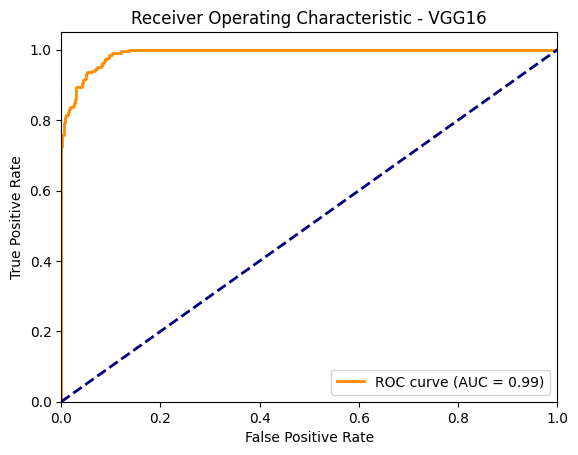

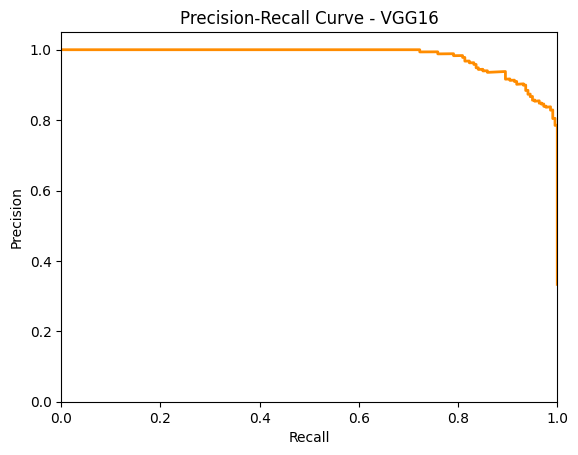

7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 803ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


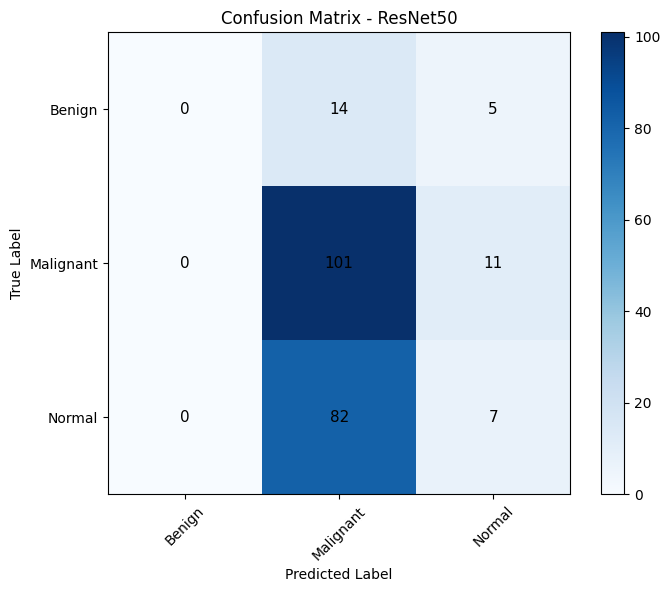

Classification Report - ResNet50:
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00        19
   Malignant       0.51      0.90      0.65       112
      Normal       0.30      0.08      0.12        89

    accuracy                           0.49       220
   macro avg       0.27      0.33      0.26       220
weighted avg       0.38      0.49      0.38       220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


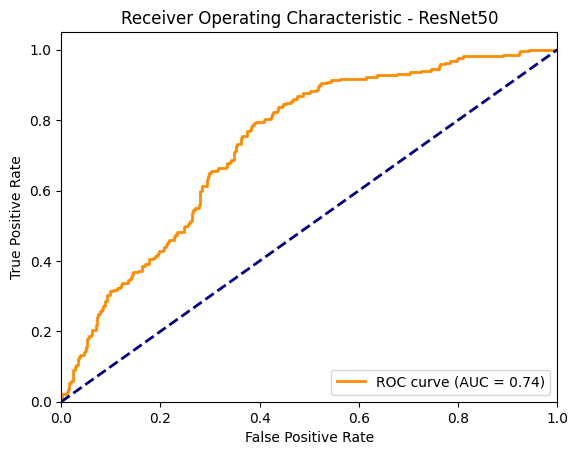

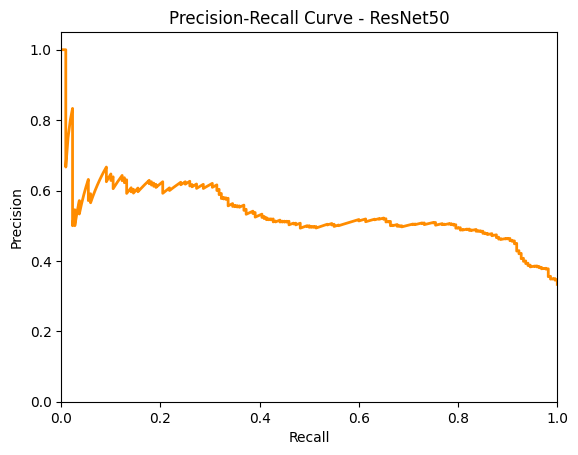

7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


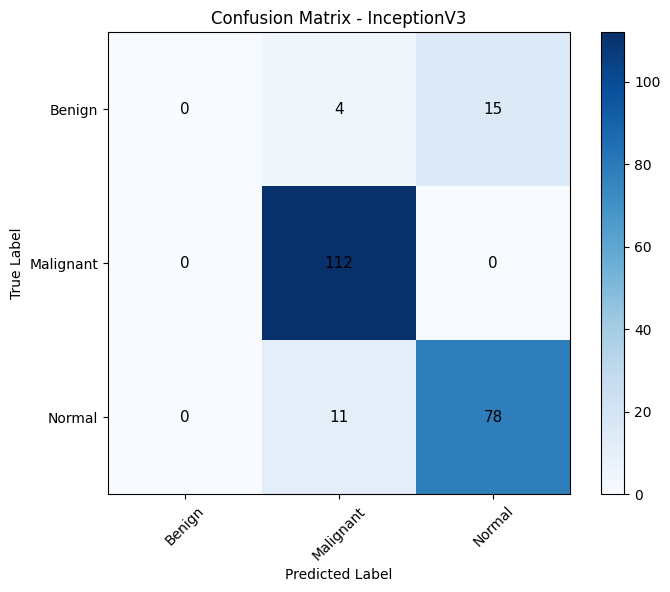

Classification Report - InceptionV3:
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00        19
   Malignant       0.88      1.00      0.94       112
      Normal       0.84      0.88      0.86        89

    accuracy                           0.86       220
   macro avg       0.57      0.63      0.60       220
weighted avg       0.79      0.86      0.82       220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


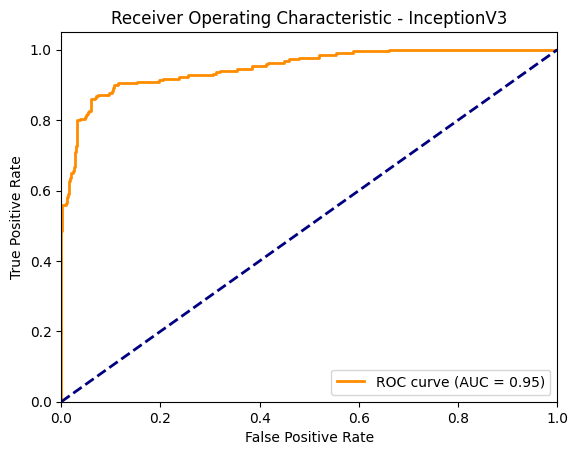

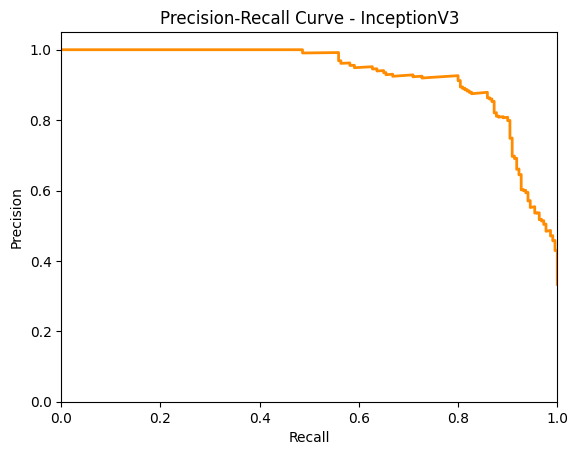

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 514ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step


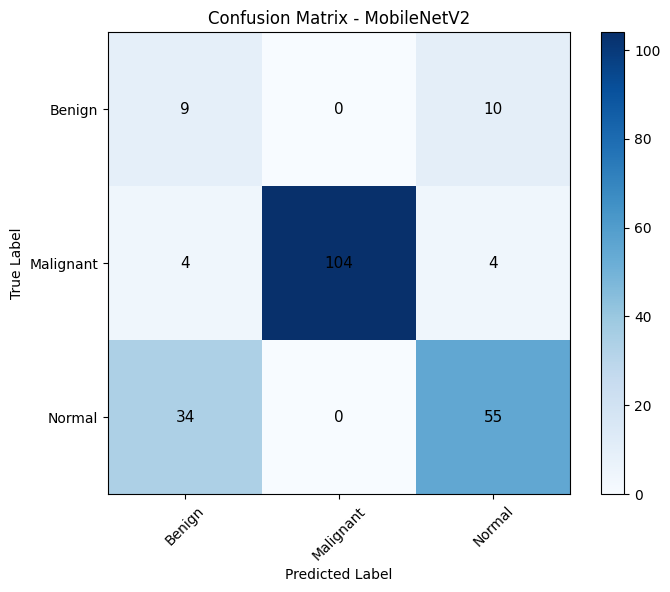

Classification Report - MobileNetV2:
              precision    recall  f1-score   support

      Benign       0.19      0.47      0.27        19
   Malignant       1.00      0.93      0.96       112
      Normal       0.80      0.62      0.70        89

    accuracy                           0.76       220
   macro avg       0.66      0.67      0.64       220
weighted avg       0.85      0.76      0.80       220



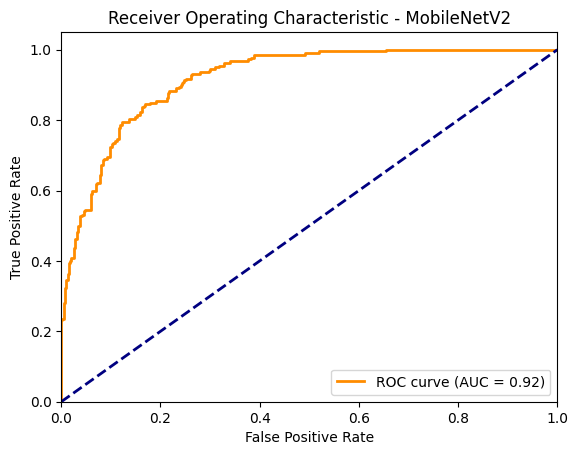

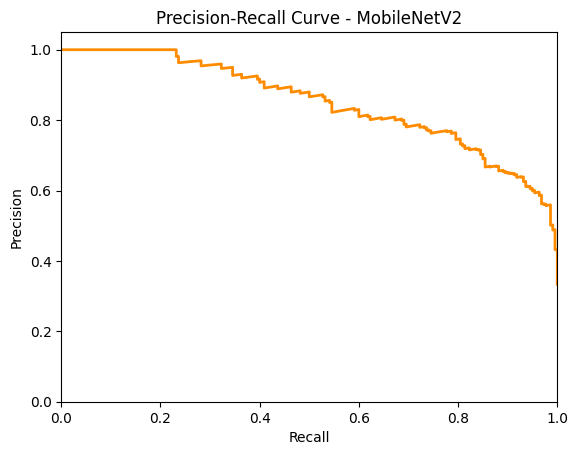

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the true labels (y_true) and predicted labels (y_pred) for each model

# Confusion Matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(unique_cancer))
    plt.xticks(tick_marks, unique_cancer, rotation=45)
    plt.yticks(tick_marks, unique_cancer)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Loop through each cell and print the value
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=11)

    plt.show()


'''
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(unique_cancer))
    plt.xticks(tick_marks, unique_cancer, rotation=45)
    plt.yticks(tick_marks, unique_cancer)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
'''

# Classification Report
def print_classification_report(y_true, y_pred, model_name):
    print(f"Classification Report - {model_name}:")
    print(classification_report(y_true, y_pred, target_names=unique_cancer))

# ROC Curve and AUC Score
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_pred_prob, model_name):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    plt.figure()
    plt.plot(recall, precision, color='darkorange', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.show()

# Iterate over each model and generate evaluations
for model_name, model in [("LungCNET", lungCNET_model), ("VGG16", vgg16_model), ("ResNet50", resnet50_model),
                           ("InceptionV3", inceptionv3_model), ("MobileNetV2", mobilenetv2_model)]:
    # Get true labels and predicted labels for the model
    y_true = np.argmax(y_val, axis=-1)  # Convert true labels to multiclass format
    y_pred = np.argmax(model.predict(val_data), axis=-1)  # Predicted label indices for the validation set
    y_pred_labels = unique_cancer[y_pred]  # Convert predicted indices to class labels
    y_true_labels = unique_cancer[y_true]  # Convert true label indices to class labels
    y_pred_prob = model.predict(val_data)  # Predicted probabilities for the validation set

    # Confusion Matrix
    plot_confusion_matrix(y_true_labels, y_pred_labels, model_name)

    # Classification Report
    print_classification_report(y_true_labels, y_pred_labels, model_name)

    # ROC Curve and AUC Score
    y_true_binary = label_binarize(y_true_labels, classes=unique_cancer)
    plot_roc_curve(y_true_binary.ravel(), y_pred_prob.ravel(), model_name)

    # Precision-Recall Curve
    plot_precision_recall_curve(y_true_binary.ravel(), y_pred_prob.ravel(), model_name)

In [32]:
#saving the model

#function to save the model
def save_model(model, suffix = None):
  """
  saves a model in a directory and appends a suffix
  """

  #create a model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models",
                        datetime.datetime.now().strftime("%Y%m%d - %H%M%S")) #Keeps track of the model time
  model_path = modeldir + "-" + suffix + ".h5" #saving file model
  print(f"Saving model to : {model_path} ....")
  model.save(model_path)

  return model_path



In [33]:
#testing the save model
save_model(lungCNET_model, suffix = "lungCNET_model Model")
save_model(vgg16_model, suffix = "vgg16_model Model")
save_model(resnet50_model, suffix = "resnet50_model Model")
save_model(inceptionv3_model, suffix = "inceptionv3_model Model")
save_model(mobilenetv2_model, suffix = "mobilenetv2_model Model")

Saving model to : /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233926-lungCNET_model Model.h5 ....


Saving model to : /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233934-vgg16_model Model.h5 ....


Saving model to : /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233935-resnet50_model Model.h5 ....


Saving model to : /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233940-inceptionv3_model Model.h5 ....


Saving model to : /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233944-mobilenetv2_model Model.h5 ....


'/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233944-mobilenetv2_model Model.h5'

In [38]:
import tensorflow as tf
import time
import numpy as np
import os
import psutil
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import pandas as pd

# Define model paths with correct timestamps
base_path = "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/"
current_date = "20241030"

model_paths = {
    "lungCNET_model Model": f"{base_path}{current_date} - 233926-lungCNET_model Model.h5",
    "vgg16_model Model": f"{base_path}{current_date} - 233934-vgg16_model Model.h5",
    "resnet50_model Model": f"{base_path}{current_date} - 233935-resnet50_model Model.h5",
    "inceptionv3_model Model": f"{base_path}{current_date} - 233940-inceptionv3_model Model.h5",
    "mobilenetv2_model Model": f"{base_path}{current_date} - 233944-mobilenetv2_model Model.h5"
}

# Verify paths exist before proceeding
print("Verifying model paths...")
for model_name, path in model_paths.items():
    if os.path.exists(path):
        print(f"✓ Found {model_name}")
        print(f"  Path: {path}")
        print(f"  Size: {os.path.getsize(path) / (1024 * 1024):.2f} MB")
    else:
        print(f"✗ Missing {model_name}")
        print(f"  Attempted path: {path}")

Verifying model paths...
✓ Found lungCNET_model Model
  Path: /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233926-lungCNET_model Model.h5
  Size: 677.64 MB
✓ Found vgg16_model Model
  Path: /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233934-vgg16_model Model.h5
  Size: 168.52 MB
✓ Found resnet50_model Model
  Path: /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233935-resnet50_model Model.h5
  Size: 270.36 MB
✓ Found inceptionv3_model Model
  Path: /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233940-inceptionv3_model Model.h5
  Size: 250.43 MB
✓ Found mobilenetv2_model Model
  Path: /content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/20241030 - 233944-mobilenetv2_model Model.h5
  Size: 26.28 MB


In [41]:

import tensorflow as tf
import time
import numpy as np
import os
import psutil
import pandas as pd

# Model paths (verified)
base_path = "/content/drive/MyDrive/SalfordUniversity/Lung Cancer/Lung Cancer 2/models/"
current_date = "20241030"

model_paths = {
    "lungCNET_model Model": f"{base_path}{current_date} - 233926-lungCNET_model Model.h5",
    "vgg16_model Model": f"{base_path}{current_date} - 233934-vgg16_model Model.h5",
    "resnet50_model Model": f"{base_path}{current_date} - 233935-resnet50_model Model.h5",
    "inceptionv3_model Model": f"{base_path}{current_date} - 233940-inceptionv3_model Model.h5",
    "mobilenetv2_model Model": f"{base_path}{current_date} - 233944-mobilenetv2_model Model.h5"
}

def measure_model_metrics(model_path, model_name, val_data):
    metrics = {}
    print(f"\n{'='*20} Measuring {model_name} {'='*20}")

    # 1. MODEL SIZE AND PARAMETERS
    model_size_mb = os.path.getsize(model_path) / (1024 * 1024)
    print(f"Loading model: {model_name}")
    model = tf.keras.models.load_model(model_path)

    metrics.update({
        'Model': model_name,
        'Model Size (MB)': round(model_size_mb, 2),
        'Parameters (M)': round(model.count_params() / 1_000_000, 2)
    })

    # 2. INFERENCE TIME
    print("Measuring inference times...")
    def measure_inference_time(batch_size=32, iterations=20):
        times = []
        for batch in val_data.take(1):
            test_batch = batch[0][:batch_size]
            break

        # Warmup
        model.predict(test_batch)

        # Measure inference time
        for _ in range(iterations):
            start = time.time()
            _ = model.predict(test_batch)
            times.append((time.time() - start) * 1000)  # Convert to ms

        return np.mean(times), np.std(times)

    # Measure for both single image and batch
    single_time, single_std = measure_inference_time(batch_size=1)
    batch_time, batch_std = measure_inference_time(batch_size=32)

    metrics.update({
        'Single Image Inference (ms)': round(single_time, 2),
        'Batch Inference (ms)': round(batch_time, 2)
    })

    # 3. MEMORY USAGE
    print("Measuring memory usage...")
    process = psutil.Process(os.getpid())
    baseline_memory = process.memory_info().rss / 1024 / 1024

    # Run inference
    for batch in val_data.take(1):
        _ = model.predict(batch[0])
    peak_memory = process.memory_info().rss / 1024 / 1024

    metrics.update({
        'Peak Memory Usage (MB)': round(peak_memory - baseline_memory, 2),
        'GPU Memory Required (MB)': round((peak_memory - baseline_memory) * 1.5, 2)  # 1.5x buffer
    })

    # 4. HARDWARE COMPATIBILITY
    metrics.update({
        'CPU Compatible': 'Yes' if model_size_mb < 1000 else 'Limited',
        'Basic GPU Compatible': 'Yes' if (peak_memory - baseline_memory) * 1.5 < 4000 else 'No'
    })

    # Clear memory
    tf.keras.backend.clear_session()

    return metrics

# Collect metrics
print("\nStarting comprehensive measurements...")
all_metrics = []

for model_name, model_path in model_paths.items():
    try:
        metrics = measure_model_metrics(model_path, model_name, val_data)
        all_metrics.append(metrics)
        print(f"Completed measurements for {model_name}")
    except Exception as e:
        print(f"Error measuring {model_name}: {str(e)}")

# Create results DataFrame
results_df = pd.DataFrame(all_metrics)
results_df = results_df.set_index('Model')

# Calculate relative metrics (only for numeric columns)
numeric_cols = results_df.select_dtypes(include=[np.number]).columns
relative_df = results_df[numeric_cols].div(results_df.loc["lungCNET_model Model"][numeric_cols])

# Print results
print("\nAbsolute Metrics:")
print("=" * 80)
print(results_df)

print("\nMetrics Relative to LungCNET (1.0 = same as LungCNET):")
print("=" * 80)
print(relative_df.round(2))

# Save results
results_df.to_csv('model_metrics.csv')
relative_df.to_csv('relative_metrics.csv')

# Print summary of key findings
print("\nKey Findings:")
print("=" * 80)
for metric in ['Model Size (MB)', 'Parameters (M)', 'Single Image Inference (ms)', 'Peak Memory Usage (MB)']:
    print(f"\n{metric}:")
    sorted_models = results_df[metric].sort_values()
    for model, value in sorted_models.items():
        print(f"{model}: {value:,.2f}")
'''

This updated script:
1. Removes dependency on training histories
2. Focuses on measurable metrics from the saved models:
   - Model size and parameters
   - Inference time (single and batch)
   - Memory usage
   - Hardware compatibility
3. Provides both absolute and relative comparisons
4. Includes a summary of key findings

'''


Starting comprehensive measurements...

==================== Measuring lungCNET_model Model ====================
Loading model: lungCNET_model Model


Measuring inference times...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━

Measuring inference times...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━

Measuring inference times...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Measuring inference times...
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Measuring inference times...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

'\n\nThis updated script:\n1. Removes dependency on training histories\n2. Focuses on measurable metrics from the saved models:\n   - Model size and parameters\n   - Inference time (single and batch)\n   - Memory usage\n   - Hardware compatibility\n3. Provides both absolute and relative comparisons\n4. Includes a summary of key findings\n\n'

In [42]:

import tensorflow as tf
import time
import numpy as np
import os
import psutil
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import pandas as pd

def measure_complete_metrics(model, model_name, val_data, training_history):
    metrics = {}
    print(f"\n{'='*20} Measuring {model_name} {'='*20}")

    # 1. MODEL SIZE & PARAMETERS (Already have these)

    # 2. FLOPs Calculation
    print("Calculating FLOPs...")
    def get_flops():
        concrete = tf.function(lambda x: model(x))
        for batch in val_data.take(1):
            test_input = batch[0][:1]
            break

        concrete_func = concrete.get_concrete_function(test_input)
        frozen_func, _ = convert_variables_to_constants_v2(concrete_func)
        run_meta = tf.compat.v1.RunMetadata()
        opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        flops = tf.compat.v1.profiler.profile(graph=frozen_func.graph,
                                            run_meta=run_meta, cmd='scope', options=opts)
        return flops.total_float_ops

    try:
        metrics['FLOPs'] = get_flops()
    except Exception as e:
        print(f"Error calculating FLOPs: {str(e)}")

    # 3. Performance Metrics
    print("Calculating performance metrics...")
    if training_history:
        metrics.update({
            'Validation Accuracy (%)': round(max(training_history.history['val_accuracy']) * 100, 2),
            'Best Validation Loss': round(min(training_history.history['val_loss']), 4),
        })

        # Calculate average F1-score if available
        if 'val_f1_score' in training_history.history:
            metrics['F1-Score'] = round(max(training_history.history['val_f1_score']), 4)

    # 4. Training Time
    print("Calculating training metrics...")
    if training_history:
        # Total training time
        if 'time_per_epoch' in training_history.history:
            total_time = sum(training_history.history['time_per_epoch'])
            metrics['Total Training Time (min)'] = round(total_time / 60, 2)
            metrics['Average Time per Epoch (s)'] = round(np.mean(training_history.history['time_per_epoch']), 2)

        # Convergence speed
        metrics['Epochs to Converge'] = np.argmin(training_history.history['val_loss']) + 1

    return metrics

# Usage
models_to_measure = {
    "lungCNET_model": lungCNET_model,
    "vgg16_model": vgg16_model,
    "resnet50_model": resnet50_model,
    "inceptionv3_model": inceptionv3_model,
    "mobilenetv2_model": mobilenetv2_model
}

histories = {
    "lungCNET_model": lungCNET_model_history,
    "vgg16_model": vgg16_model_history,
    "resnet50_model": resnet50_model_history,
    "inceptionv3_model": inceptionv3_model_history,
    "mobilenetv2_model": mobilenetv2_model_history
}

# Measure all metrics
all_metrics = []
for name, model in models_to_measure.items():
    try:
        metrics = measure_complete_metrics(model, name, val_data, histories[name])
        all_metrics.append(metrics)
    except Exception as e:
        print(f"Error measuring {name}: {str(e)}")

# Create final results DataFrame
results_df = pd.DataFrame(all_metrics)

# Print and save results
print("\nComplete Model Comparison:")
print(results_df)
results_df.to_csv('complete_model_metrics.csv')



==================== Measuring lungCNET_model ====================
Calculating FLOPs...
Error calculating FLOPs: cannot unpack non-iterable WrappedFunction object
Calculating performance metrics...
Calculating training metrics...

==================== Measuring vgg16_model ====================
Calculating FLOPs...
Error calculating FLOPs: cannot unpack non-iterable WrappedFunction object
Calculating performance metrics...
Calculating training metrics...

==================== Measuring resnet50_model ====================
Calculating FLOPs...
Error calculating FLOPs: cannot unpack non-iterable WrappedFunction object
Calculating performance metrics...
Calculating training metrics...

==================== Measuring inceptionv3_model ====================
Calculating FLOPs...
Error calculating FLOPs: cannot unpack non-iterable WrappedFunction object
Calculating performance metrics...
Calculating training metrics...

==================== Measuring mobilenetv2_model ====================
Calcu